            Geneid  pCDH  CDK6  CDK6_D224Y
0  ENSG00000223972     0     0           0
1  ENSG00000227232    21    12          21
2  ENSG00000278267     1     5           5
3  ENSG00000243485     0     0           0
4  ENSG00000284332     0     0           0
Checking for missing data
Geneid        0
pCDH          0
CDK6          0
CDK6_D224Y    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58884 entries, 0 to 58883
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Geneid      58884 non-null  object
 1   pCDH        58884 non-null  int64 
 2   CDK6        58884 non-null  int64 
 3   CDK6_D224Y  58884 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ MB
                     pCDH      CDK6  CDK6_D224Y
Geneid                                         
ENSG00000223972  0.000000  0.000000    0.000000
ENSG00000227232  0.707107 -1.414214    0.707107
ENSG00000278267 -1.414214  0.707107    0.707107
E

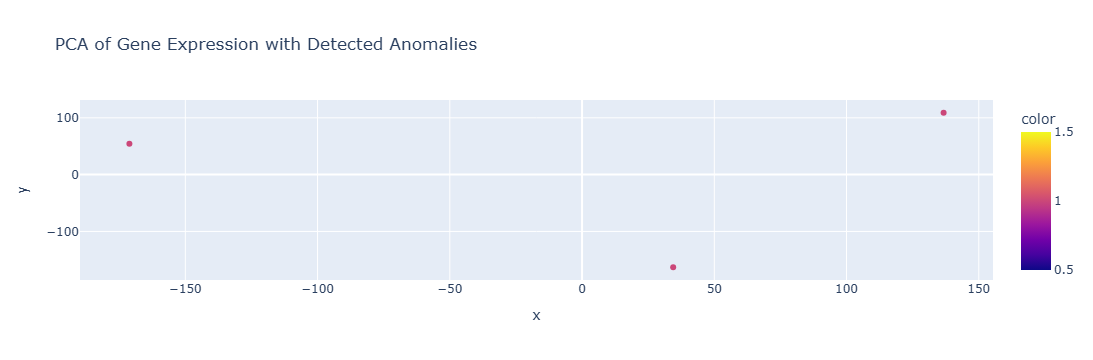

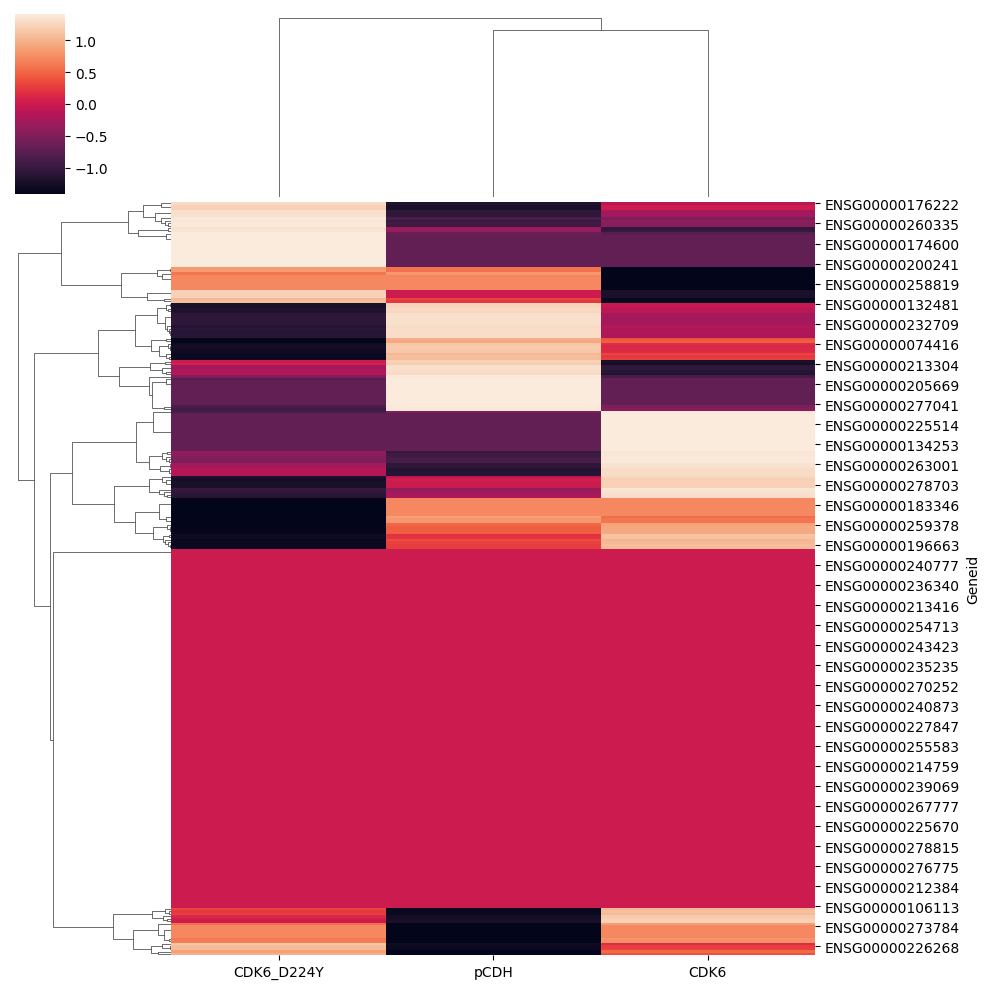

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD FILE
df = pd.read_excel(r"C:\Users\LENOVO\OneDrive\Belgeler\GSE282062_Original_read_count.xlsx")
print(df.head())

print("Checking for missing data")
print(df.isnull().sum())

df.info()
df.describe()

# CLEAN & TRANSFORM
df = df.set_index('Geneid')       
df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna(axis=0)

# NORMALIZE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.T)   # scale samples, not genes
X_scaled = X_scaled.T                  # convert back to gene × sample matrix

df_scaled = pd.DataFrame(X_scaled, index=df.index, columns=df.columns)
print(df_scaled)

# ANOMALY DETECTION
iso = IsolationForest(contamination=0.03, random_state=42)
anomaly_scores = iso.fit_predict(df_scaled.T)   # detect anomalies on samples

# Add anomaly as a new ROW (because it refers to samples)
df_scaled.loc['anomaly_score'] = anomaly_scores

print("Anomaly Scores:", anomaly_scores)

# PCA
pca = PCA(n_components=2)
coords = pca.fit_transform(df_scaled.drop(index='anomaly_score').T)

fig = px.scatter(
    x=coords[:,0], 
    y=coords[:,1],
    color=anomaly_scores,
    title="PCA of Gene Expression with Detected Anomalies"
)
fig.show()

# HEATMAP
sns.clustermap(df_scaled.drop(index='anomaly_score').sample(300, replace=True))
plt.show()

